In [561]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [562]:
img_path = "./data/road1.png"

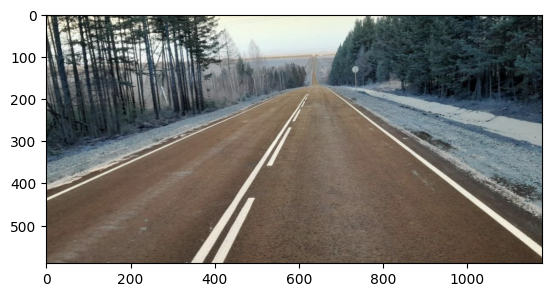

In [563]:
img = cv2.imread(img_path)
plt.imshow(img)

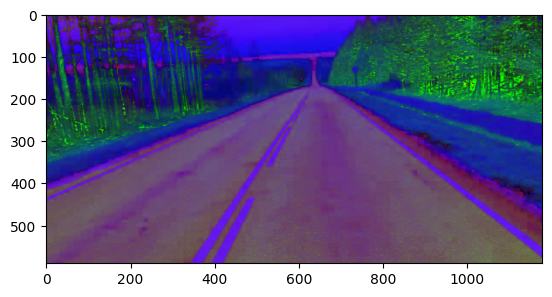

In [564]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(hsv_img, cmap="gray")

In [565]:
white_mask = cv2.inRange(hsv_img, (0, 0, 204), (179.5, 25.5, 255))
yellow_mask = cv2.inRange(hsv_img, (17.5, 51, 76.5), (32.5, 255, 255))
mask = cv2.add(white_mask, yellow_mask)

In [566]:
masked_img = np.zeros_like(hsv_img)
for i in range(3):
    masked_img[:,:,i] = mask.copy()

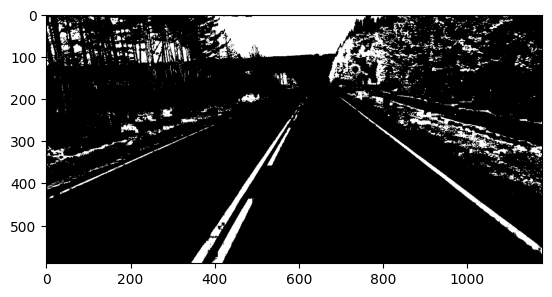

In [567]:
plt.imshow(masked_img)

In [568]:
canny_img = cv2.Canny(masked_img, 50, 300)

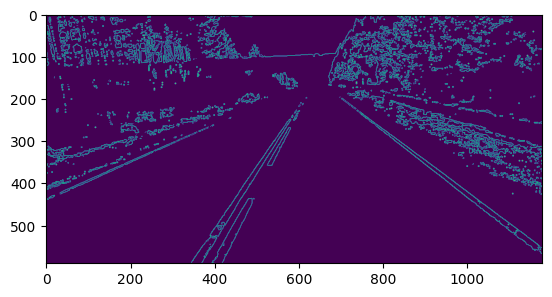

In [569]:
plt.imshow(canny_img)

In [570]:
def region_selection(image):
    mask = np.zeros_like(image)   
    if len(image.shape) > 2:
        channel_count = image.shape[2]
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
    
    
    rows, cols = image.shape[:2]
    bottom_left  = [cols * 0, rows * 0.95]
    top_left     = [cols * 0.3, rows * 0.6]
    bottom_right = [cols * 1, rows * 0.95]
    top_right    = [cols * 0.6, rows * 0.3]
    vertices = np.array([[bottom_left, top_left, top_right, bottom_right]], dtype=np.int32)

    cv2.fillPoly(mask, vertices, ignore_mask_color)

    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

In [571]:
masked_img = region_selection(canny_img)

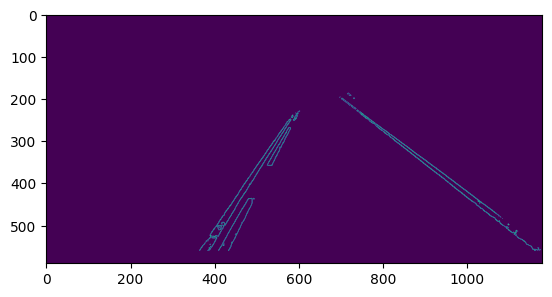

In [572]:
plt.imshow(masked_img)

In [578]:
lines = cv2.HoughLinesP(masked_img, 1, np.pi / 180, threshold=170, minLineLength=100, maxLineGap=150)

In [579]:
height, width = img.shape[:2]
center_bottom = (width // 2, height)

In [580]:
nearest_left_line = None
nearest_right_line = None
min_left_distance = float('inf')
min_right_distance = float('inf')
for line in lines:
    x1, y1, x2, y2 = line[0]
    distance = np.abs((x2 - x1) * (y1 - center_bottom[1]) - (x1 - center_bottom[0]) * (y2 - y1)) / np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    if x1 < center_bottom[0]:
        if distance < min_left_distance:
            nearest_left_line = line
            min_left_distance = distance
    elif x1 > center_bottom[0]:
        if distance < min_right_distance:
            nearest_right_line = line
            min_right_distance = distance

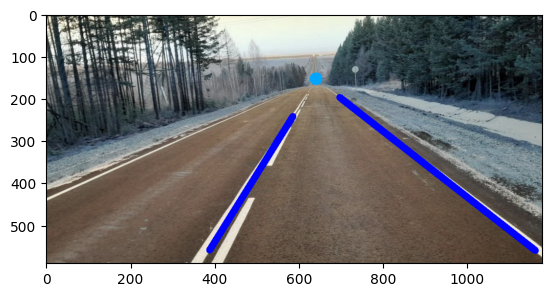

In [581]:
if nearest_left_line is not None and nearest_right_line is not None:
    x1_left, y1_left, x2_left, y2_left = nearest_left_line[0]
    x1_right, y1_right, x2_right, y2_right = nearest_right_line[0]
    cv2.line(img, (x1_left, y1_left), (x2_left, y2_left), (0, 0, 255), 15)
    cv2.line(img, (x1_right, y1_right), (x2_right, y2_right), (0, 0, 255), 15)
    m_left = (y2_left - y1_left) / (x2_left - x1_left)
    m_right = (y2_right - y1_right) / (x2_right - x1_right)
    b_left = y1_left - m_left * x1_left
    b_right = y1_right - m_right * x1_right
    x_intersect = (b_right - b_left) / (m_left - m_right)
    y_intersect = m_left * x_intersect + b_left
    cv2.circle(img, (int(x_intersect),int(y_intersect)), 15, (0, 165, 255), -1)

plt.imshow(img)
plt.show()